In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set_style('whitegrid')

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
xls = pd.ExcelFile('data/data.xlsx')
df_sales = pd.read_excel(xls, 'Sheet1', header = 4, usecols=('C:J'))
df_consumer = pd.read_excel(xls, 'Sheet2')
df_store = pd.read_excel(xls, 'Sheet3')
df_product = pd.read_excel(xls, 'Sheet4')
# xls

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  float64       
 4   UnitPrice  32753 non-null  float64       
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   Date       32753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


In [5]:
df_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      73 non-null     object
 1   Name    73 non-null     object
 2   Size    73 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [6]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           13650 non-null  int64         
 1   City         13650 non-null  object        
 2   State        13650 non-null  object        
 3   DateOfBirth  13650 non-null  datetime64[ns]
 4   Sex          13650 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 533.3+ KB


In [7]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      7 non-null      int64 
 1   Name    7 non-null      object
 2   State   7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [8]:
df_sales.duplicated().sum()

0

In [9]:
df_sales

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21
...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,0.08,218.4,1,4,2018-12-02
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,0.08,210.0,1,4,2018-12-05
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,2019-08-01
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,0.10,218.4,2,4,2019-11-25


In [10]:
df_consumer

,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M
...,...,...,...
68,0030e635639c898b323826589761cf233,Rick Morty,G
69,003128f981470c3e5a2e7445e4a771cd1,Homer Simpsons,P
70,003128f981470c3e5a2e7445e4a771cd2,Homer Simpsons,M
71,003128f981470c3e5a2e7445e4a771cd3,Homer Simpsons,G


In [11]:
df_store

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,1985-06-28,Homem
1,14002,Florianópolis,SC,1987-01-10,Homem
2,14003,Rio de Janeiro,RJ,1979-11-05,Homem
3,14004,Rio de Janeiro,RJ,1983-11-25,Mulher
4,14005,Florianópolis,SC,1969-04-07,Homem
...,...,...,...,...,...
13645,28689,Belo Horizonte,MG,1999-01-15,Homem
13646,28691,Belo Horizonte,BH,1956-02-07,Homem
13647,28692,Porto Alegre,RS,1985-10-19,Homem
13648,28694,Curitiba,PR,1982-10-22,Homem


In [12]:
df_product

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG
6,22,Online,na


In [13]:
def plot_bars(df, final_table_columns):
    df_filter = df[df.columns.intersection(final_table_columns)]
    
    df_filter_sum = df_filter.groupby(final_table_columns[0], as_index =False).sum()
    
    plt.figure(figsize = (20, 10))
    sns.barplot(data = df_filter_sum, \
            x=final_table_columns[0], \
            y=final_table_columns[1])#.set_title('Cidade que mais arrecadou')
    
    return df_filter_sum

In [14]:
df_sales['discount_price'] = (1 - df_sales['Discount']) * df_sales['UnitPrice'] * df_sales['Quantity']

In [15]:
df_name_product = pd.merge(df_sales, df_consumer, left_on='ProductID', right_on='ID') 

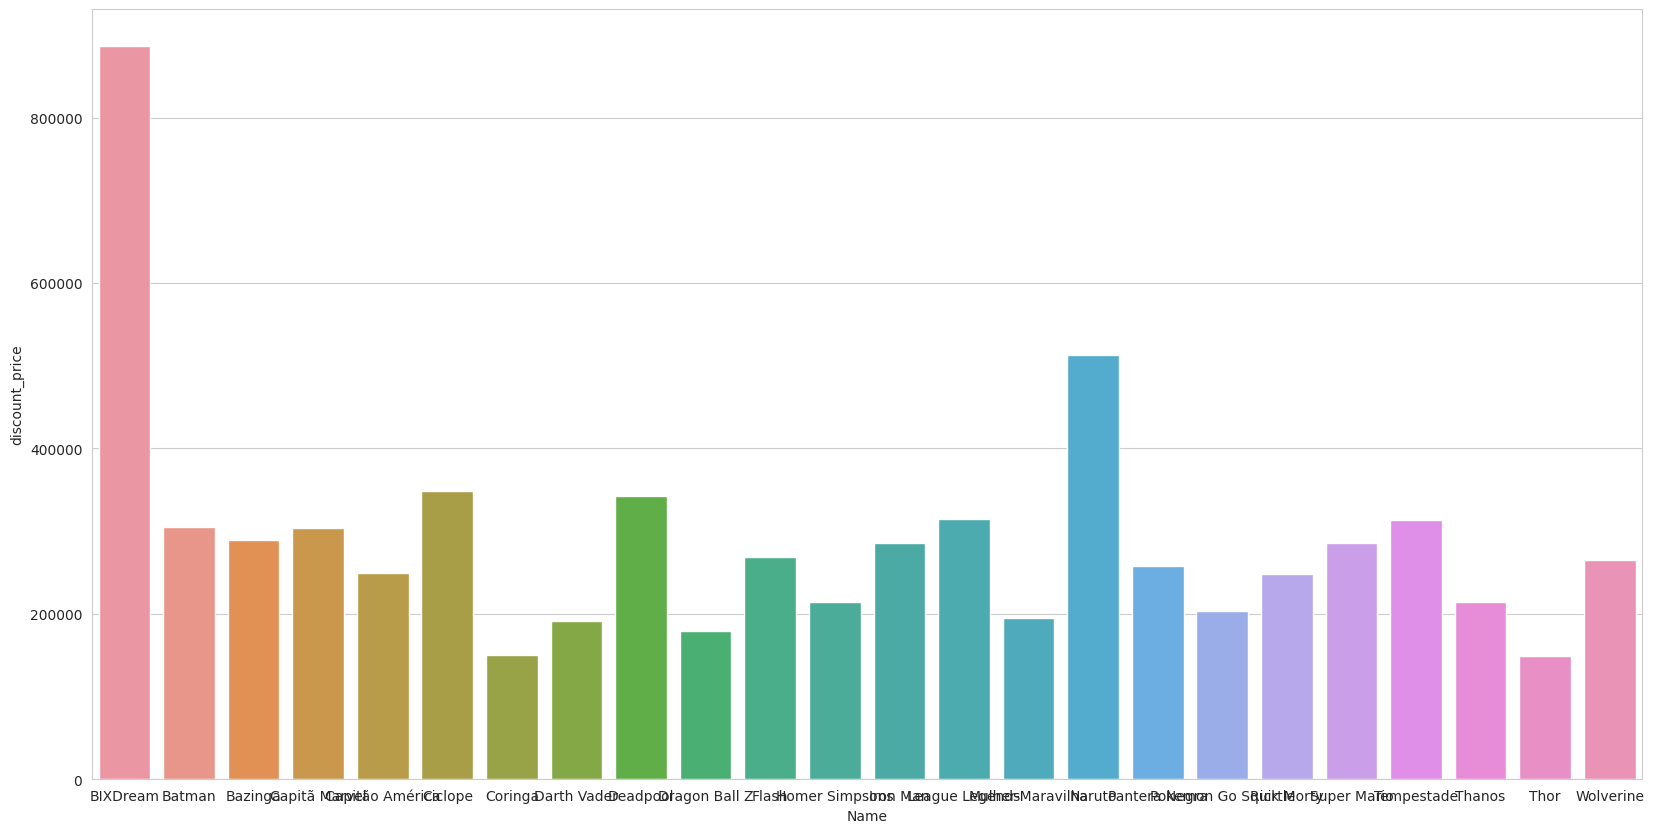

In [16]:
final_table_columns = ['Name','discount_price']
df_name_product = plot_bars(df_name_product, final_table_columns)

In [17]:
df_size_product = pd.merge(df_sales, df_consumer, left_on='ProductID', right_on='ID') 

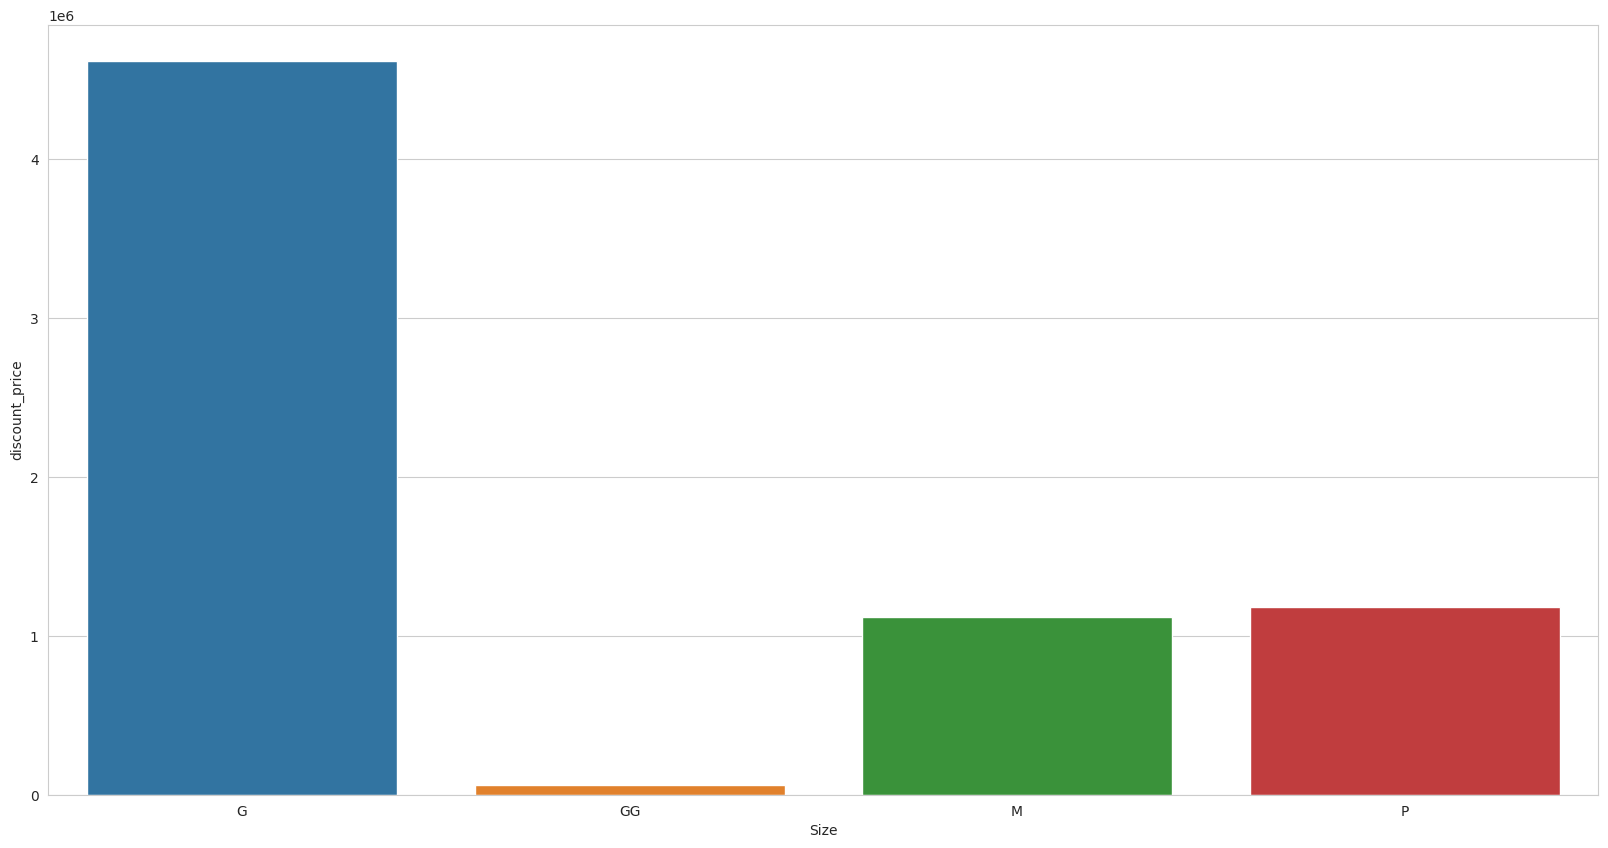

In [18]:
final_table_columns = ['Size','discount_price']
df_size_product = plot_bars(df_size_product, final_table_columns)

In [19]:
df_name_store = pd.merge(df_sales, df_store, left_on='ClientID', right_on='ID') 

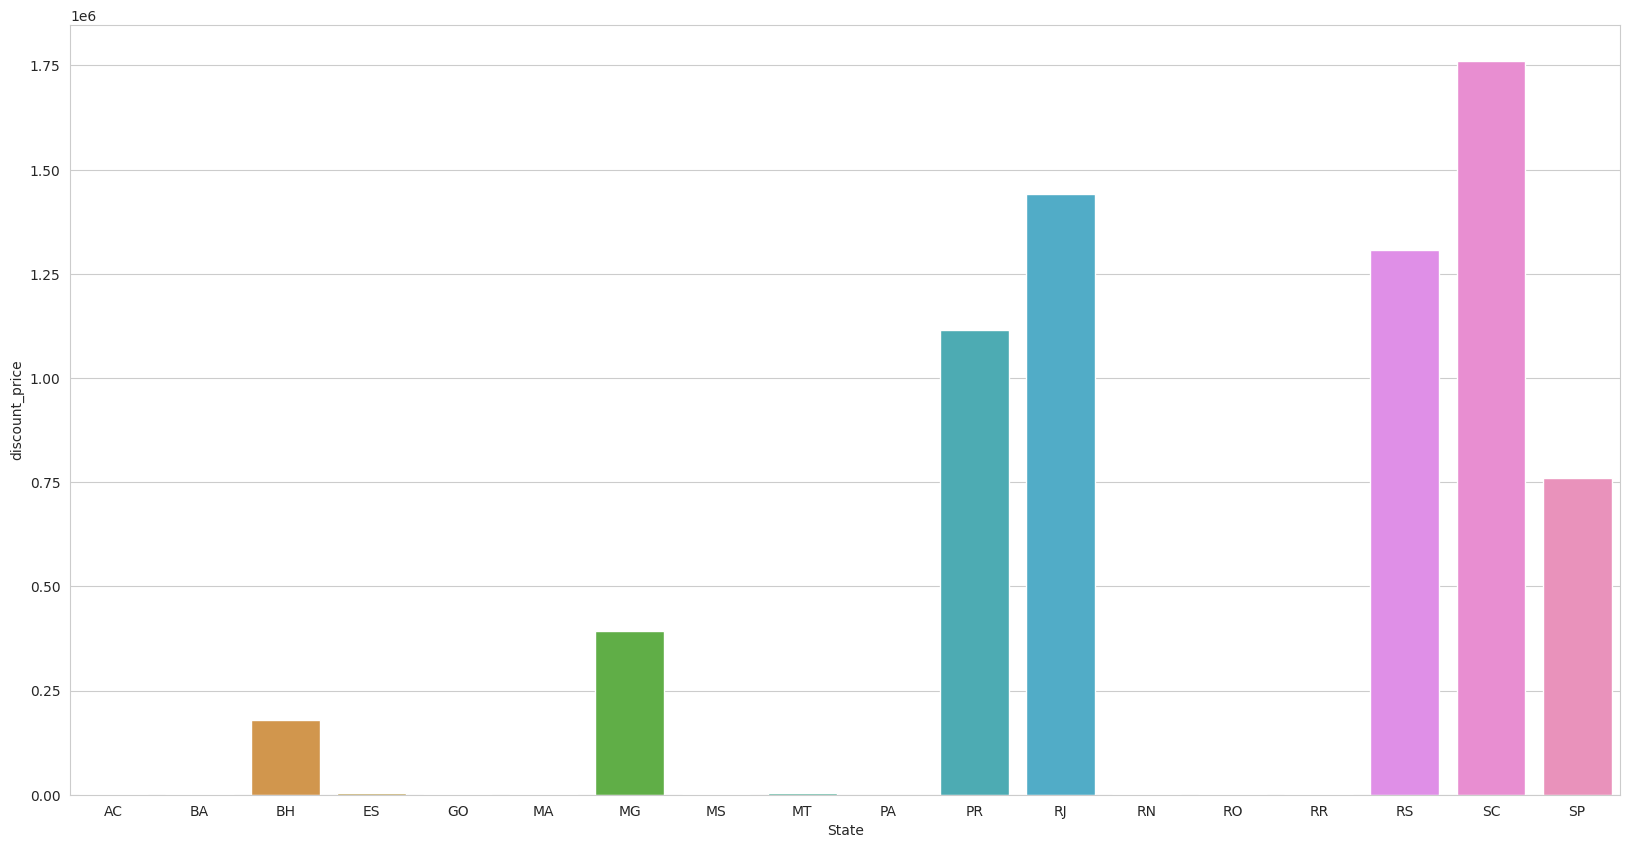

In [20]:
final_table_columns = ['State','discount_price']
df_name_store = plot_bars(df_name_store, final_table_columns)

In [21]:
df_sex = pd.merge(df_sales, df_store, left_on='ClientID', right_on='ID') 

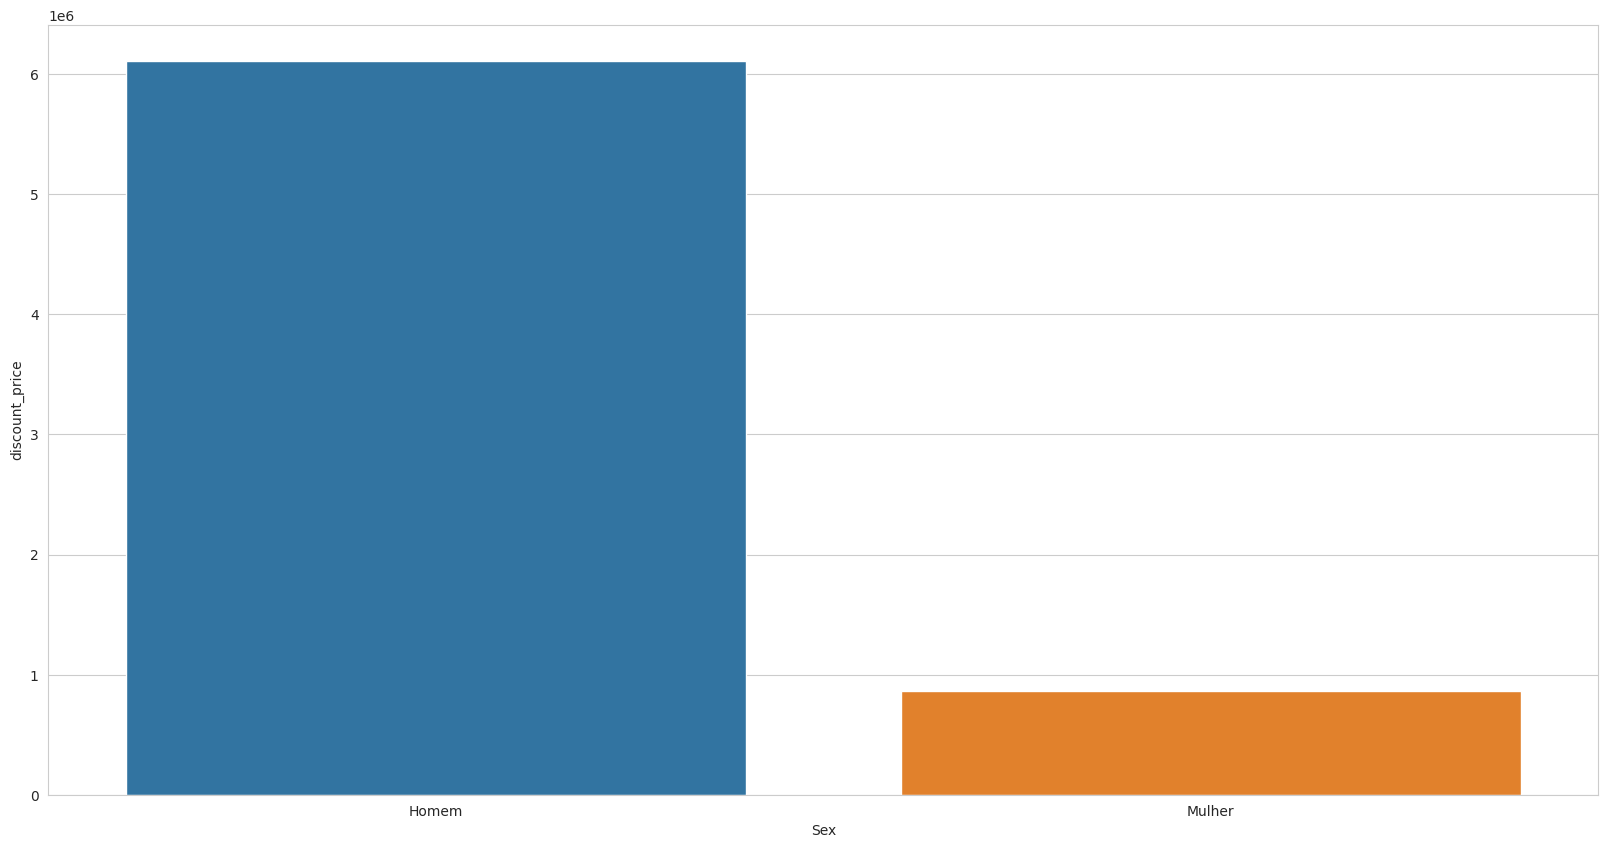

In [22]:
final_table_columns = ['Sex','discount_price']
df_sex = plot_bars(df_sex, final_table_columns)

In [23]:
df_store_id = pd.merge(df_sales, df_product, left_on='StoreID', right_on='ID') 

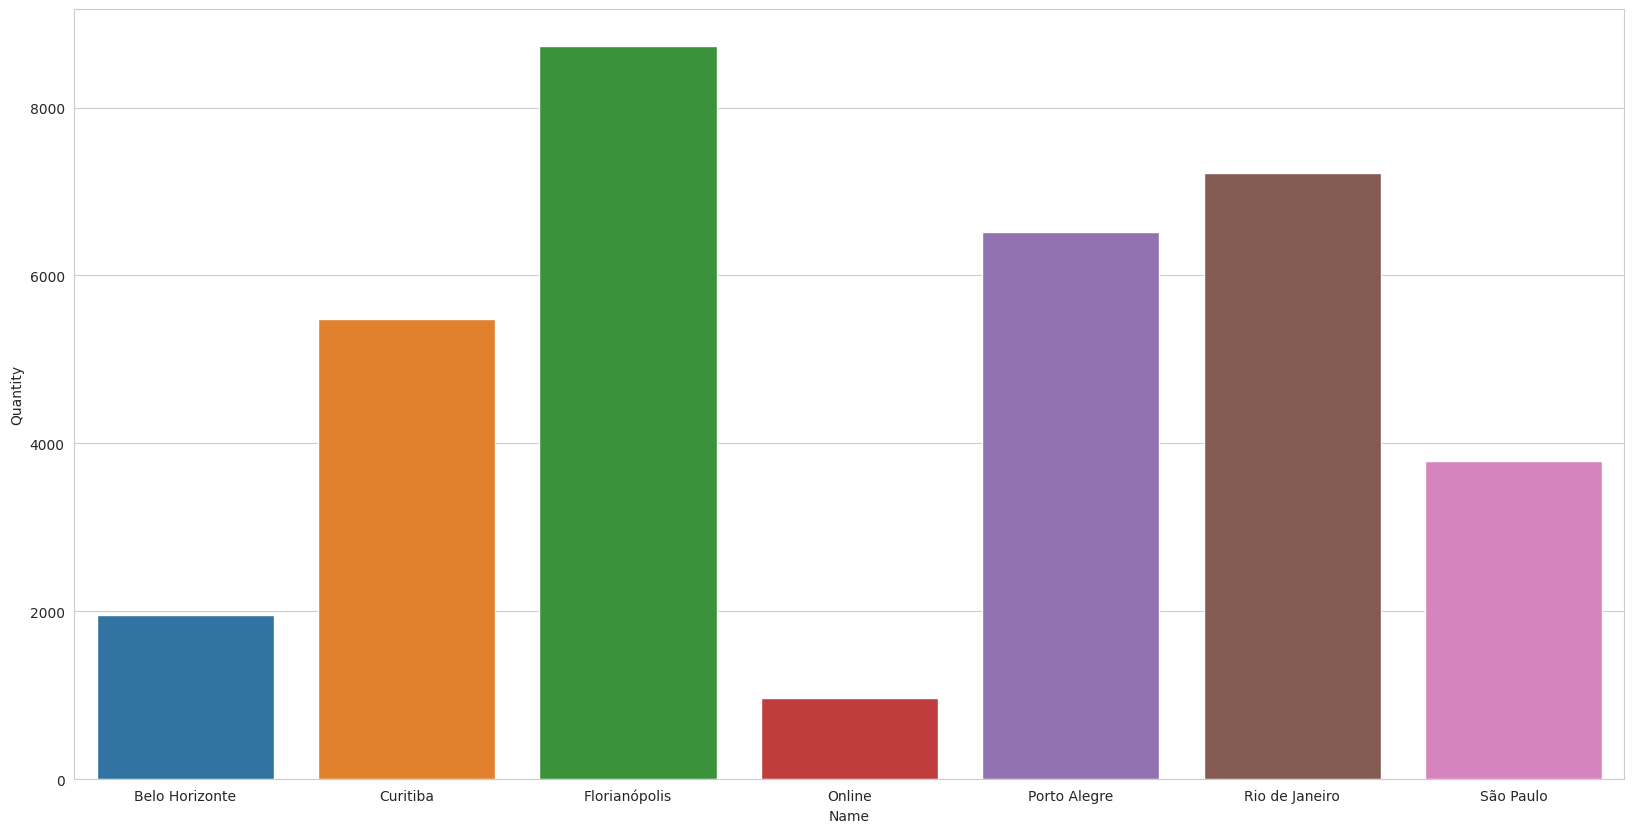

In [24]:
final_table_columns = ['Name','Quantity']
df_store_id = plot_bars(df_store_id, final_table_columns)

In [25]:
final_table_columns = ['Date' ,'discount_price']

df_filter = df_sales[df_sales.columns.intersection(final_table_columns)]
# df_filter['Date'] = df_filter['Date'].dt.date
df_filter_sum = df_filter.groupby(final_table_columns[0], as_index =False).sum()
df_filter_sum

,Date,discount_price
0,2018-03-01,5295.78
1,2018-03-02,6930.00
2,2018-03-03,8260.56
3,2018-03-04,6599.88
4,2018-03-05,7679.70
...,...,...
685,2020-01-27,3336.48
686,2020-01-28,4420.08
687,2020-01-29,2800.98
688,2020-01-30,4001.76


In [26]:
y = df_filter_sum['discount_price'].values
X = df_filter_sum['Date'].values.reshape(-1, 1)

In [27]:
modelo = LinearRegression()
modelo.fit(X, y)
X.max()

numpy.datetime64('2020-01-31T00:00:00.000000000')

In [30]:
# anos_futuros = np.arange(2020, 2030).reshape(-1, 1)  # Novamente, precisamos de uma matriz 2D

# anos_futuros = np.arange(datetime(2020-2-1), datetime(2030-12-31), timedelta(days=1)).astype(datetime)
anos_futuros = np.arange(np.datetime64('2020-1-1'), np.datetime64('2030-12-31'))
                         
                         
vendas_previstas = modelo.predict(anos_futuros)

ValueError: Error parsing datetime string "2020-1-1" at position 5

In [ ]:
for ano, venda in zip(anos_futuros.ravel(), vendas_previstas):
    print(f"Ano: {ano}, Vendas previstas: {venda:.2f}")